## **FB Prophet**

In [ ]:
# Python
import pandas as pd
from prophet import Prophet
from pandas_datareader import data as pdr
import yfinance as yfin

In [ ]:
start_date = '2024-02-28'
end_date = '2025-02-28'
ticker = 'SBUX'
df = yfin.download(ticker, start=start_date, end=end_date)['Close']
df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Ticker,SBUX
Date,
2024-02-28,90.689026
2024-02-29,92.541817
2024-03-01,90.845055
2024-03-04,90.162445
2024-03-05,88.953262
...,...
2025-02-21,111.750000
2025-02-24,113.190002
2025-02-25,114.589996


In [ ]:
df = df.reset_index() # Resets the index, moving the existing index (Date) into a column.
df.columns = ['ds', 'y'] # Now you have two columns to rename.
df.head()

,ds,y
0,2024-02-28,90.689026
1,2024-02-29,92.541817
2,2024-03-01,90.845055
3,2024-03-04,90.162445
4,2024-03-05,88.953262


In [ ]:
# Python
m = Prophet()
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp22_gx_5/eqnesf80.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp22_gx_5/co0p0ql1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88127', 'data', 'file=/tmp/tmpp22_gx_5/eqnesf80.json', 'init=/tmp/tmpp22_gx_5/co0p0ql1.json', 'output', 'file=/tmp/tmpp22_gx_5/prophet_modelyqvj098b/prophet_model-20250407191228.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:12:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:12:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Python
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
276,2025-03-25
277,2025-03-26
278,2025-03-27
279,2025-03-28
280,2025-03-29


In [ ]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
276,2025-03-25,112.425763,106.363216,118.339429
277,2025-03-26,112.734386,106.529496,118.794391
278,2025-03-27,112.685047,106.706757,118.964804
279,2025-03-28,112.756014,106.561199,118.869975
280,2025-03-29,112.897249,106.790208,118.951623


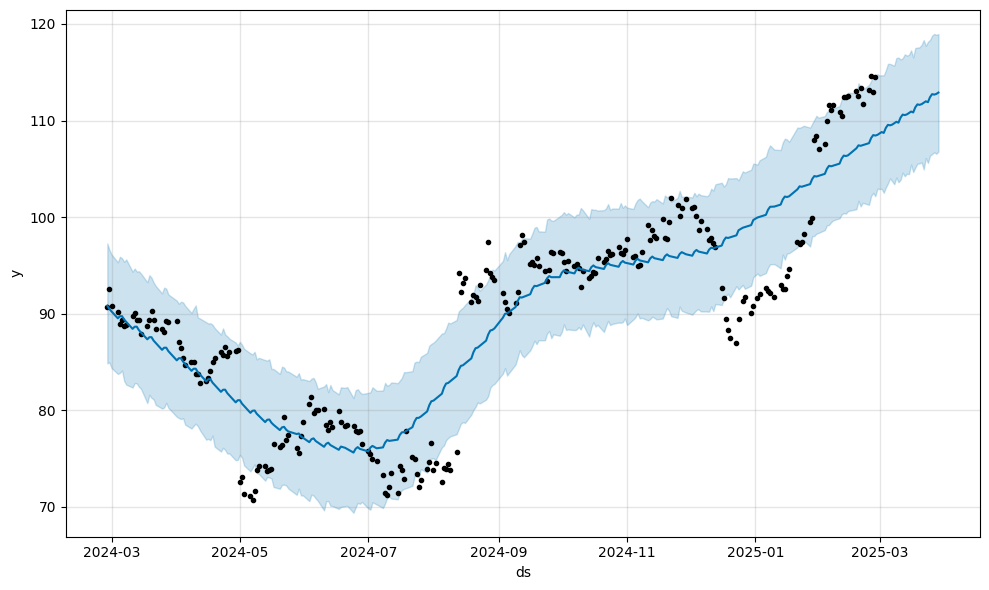

In [ ]:
# Python
fig1 = m.plot(forecast)

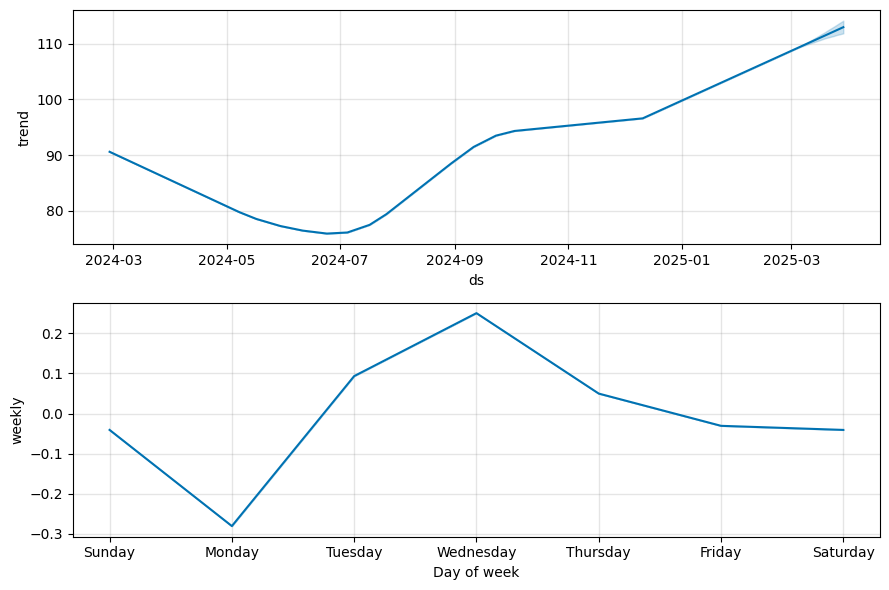

In [ ]:
# Python
fig2 = m.plot_components(forecast)

In [ ]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
# Python
plot_components_plotly(m, forecast)

## **WACC**

In [ ]:
# Inputs
E = 108.91  # Market Cap (Equity) in billion USD
D = 25.9    # Total Debt in billion USD
V = E + D   # Total Value

beta = 0.99               # Starbucks Beta
Rf = 0.043                # Risk-free rate (4.3%)
Rm = 0.095                # Market return (9.5%)
Rd = 0.035                # Cost of debt (3.5%)
T = 0.0973                # Tax rate (9.73%)

# Step 1: Calculate Cost of Equity using CAPM
Re = Rf + beta * (Rm - Rf)

# Step 2: Calculate Weights
E_weight = E / V
D_weight = D / V

# Step 3: Calculate WACC
WACC = (E_weight * Re) + (D_weight * Rd * (1 - T))

# Print Results
print(f"Cost of Equity (Re): {Re:.2%}")
print(f"WACC: {WACC:.2%}")

Cost of Equity (Re): 9.45%
WACC: 8.24%


In [ ]:
import yfinance as yf

# Define the ticker symbol
ticker = "SBUX"

# Get the company data
stock = yf.Ticker(ticker)

# Get financial statements
income_statement = stock.financials
balance_sheet = stock.balance_sheet
cash_flow = stock.cashflow

In [ ]:
income_statement

,2024-09-30,2023-09-30,2022-09-30,2021-09-30,2020-09-30
Tax Effect Of Unusual Items,0.0,16402000.0,-10304000.0,149925600.0,NaN
Tax Rate For Calcs,0.243,0.236,0.224,0.216,NaN
Normalized EBITDA,7124000000.0,7332800000.0,6290200000.0,6656700000.0,NaN
Total Unusual Items,0.0,69500000.0,-46000000.0,694100000.0,NaN
Total Unusual Items Excluding Goodwill,0.0,69500000.0,-46000000.0,694100000.0,NaN
Net Income From Continuing Operation Net Minority Interest,3760900000.0,4124500000.0,3281600000.0,4199300000.0,NaN
Reconciled Depreciation,1592400000.0,1450300000.0,1529400000.0,1524100000.0,NaN
Reconciled Cost Of Revenue,26387300000.0,26041700000.0,23797700000.0,20587200000.0,NaN
EBITDA,7124000000.0,7402300000.0,6244200000.0,7350800000.0,NaN
EBIT,5531600000.0,5952000000.0,4714800000.0,5826700000.0,NaN


In [ ]:
balance_sheet

,2024-09-30,2023-09-30,2022-09-30,2021-09-30,2020-09-30
Ordinary Shares Number,1133500000.0,1142600000.0,1147900000.0,1180000000.0,NaN
Share Issued,1133500000.0,1142600000.0,1147900000.0,1180000000.0,NaN
Net Debt,12282200000.0,11848200000.0,12225500000.0,8160100000.0,NaN
Total Debt,25803100000.0,24599800000.0,23804800000.0,23605100000.0,NaN
Tangible Book Value,-10865500000.0,-11333600000.0,-12146000000.0,-9348400000.0,NaN
...,...,...,...,...,...
Allowance For Doubtful Accounts Receivable,-21200000.0,-23800000.0,-27200000.0,-25600000.0,NaN
Gross Accounts Receivable,1235000000.0,1207900000.0,1202700000.0,965600000.0,NaN
Cash Cash Equivalents And Short Term Investments,3543200000.0,3953000000.0,3182900000.0,6617900000.0,NaN
Other Short Term Investments,257000000.0,401500000.0,364500000.0,162200000.0,NaN


In [ ]:
cash_flow

,2024-09-30,2023-09-30,2022-09-30,2021-09-30,2020-09-30
Free Cash Flow,3318100000.0,3675100000.0,2556000000.0,4519100000.0,NaN
Repurchase Of Capital Stock,-1266700000.0,-984400000.0,-4013000000.0,0.0,NaN
Repayment Of Debt,-1982600000.0,-1253800000.0,-1036600000.0,-1896300000.0,NaN
Issuance Of Debt,2119100000.0,1612400000.0,1709700000.0,215100000.0,NaN
Issuance Of Capital Stock,108000000.0,167400000.0,101600000.0,246200000.0,NaN
...,...,...,...,...,...
Depreciation And Amortization,1592400000.0,1450300000.0,1529400000.0,1524100000.0,NaN
Operating Gains Losses,-184900000.0,-291700000.0,-177300000.0,-985600000.0,NaN
Earnings Losses From Equity Investments,-306400000.0,-301800000.0,-268700000.0,-347300000.0,NaN
Gain Loss On Sale Of Business,NaN,0.0,0.0,-864500000.0,0.0
